# Text data analysis on Youtube comments

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Read data
comments = pd.read_csv("GBcomments.csv", error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


Basic Information about the dataframe:

In [4]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718452 entries, 0 to 718451
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      718452 non-null  object
 1   comment_text  718424 non-null  object
 2   likes         718452 non-null  int64 
 3   replies       718452 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 21.9+ MB


Check NULL values and drop them from dataset-

In [5]:
comments.isnull().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [6]:
comments.dropna(inplace=True)
comments.shape

(718424, 4)

# Perform sentimental analysis on comments:

In [7]:
#!pip install textblob              library used for sentiment analysis

In [8]:
from textblob import TextBlob

In [9]:
polarity = []
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [10]:
comments['polarity'] = polarity

In [11]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


Performing EDA on Positive sentiment Comments-

In [12]:
comments_positive = comments[comments['polarity'] == 1]

In [13]:
comments_positive.shape

(20400, 5)

In [14]:
# pip install wordcloud
# This library is used to visualise the Importance of a word in a given large chunk of text based on its usage frequency

In [15]:
from wordcloud import WordCloud,STOPWORDS      
##STOPWORDS is used to exclude words like he,she,they etc which don't carry any importance in our analysis

In [16]:
stopwords = set(STOPWORDS)

In [17]:
total_comments = " ".join(comments_positive['comment_text'])

In [18]:
wordcloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

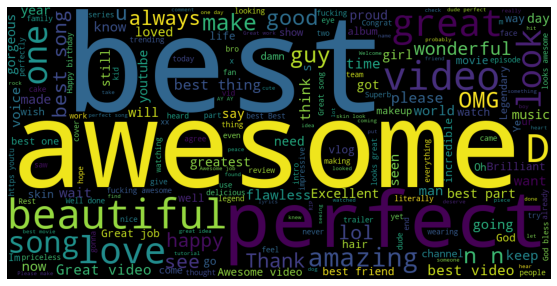

In [19]:
plt.figure(figsize = (15,5))
plt.imshow(wordcloud)
plt.axis("off")                           ## Higher the frequency of the word, the higher is its priority(Size).

Performing EDA ON Negative sentiment comments-

In [20]:
comments_negative = comments[comments['polarity'] == -1]
comments_negative.shape

(3339, 5)

In [21]:
total_comments = " ".join(comments_negative['comment_text'])

In [22]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

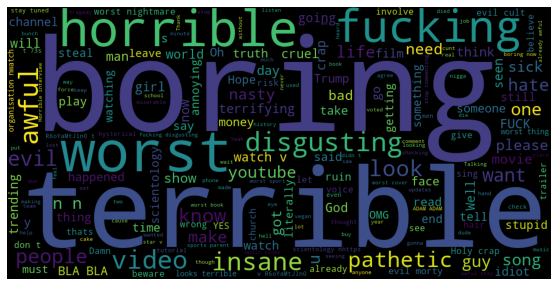

In [23]:
plt.figure(figsize = (15,5))
plt.imshow(wordcloud)
plt.axis("off") 

## Analyse trending tags and views on Youtube

In [24]:
videos = pd.read_csv('USvideos.csv', error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [25]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [26]:
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [27]:
tags = " ".join(videos['tags'])

In [29]:
# Displaying only the first 1000 characters of tags-
tags[:1000]

'logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

Removing Noise in Tags i.e anything other than the alphabetic characters using 'Regular Expressions':

In [30]:
import re

In [31]:
tags = re.sub('[^a-zA-Z]',' ',tags)

In [32]:
tags = re.sub(' +',' ',tags)

In [33]:
# Displaying only the first 1000 characters of tags-
tags[:1000]

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

In [34]:
wordcloud = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

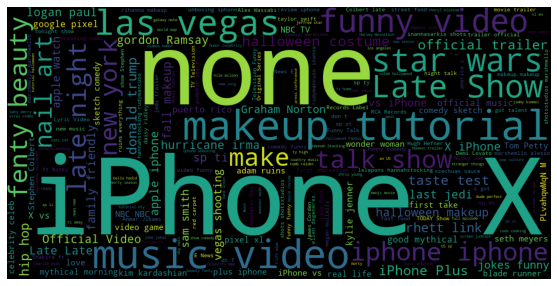

In [35]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")             # Following are the Trending Tags on Youtube

# Analyse likes, dislikes, views and their correlation : 

Using regression plot to visualise relationship between views and likes

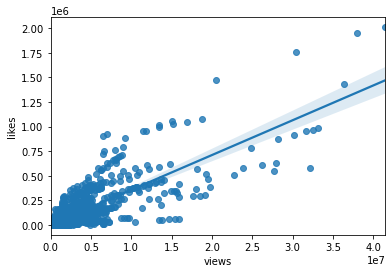

In [36]:
sns.regplot(data=videos, x='views', y='likes')
plt.show()

Using regression plot to visualise relationship between views and dislikes-

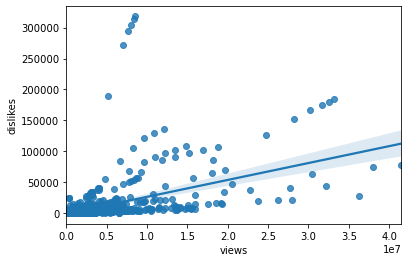

In [37]:
sns.regplot(data=videos, x='views', y='dislikes')
plt.show()                                          # Dislikes are not as strongly related to views as likes

Finding out their correlation with each other-

In [38]:
df = videos[['views','likes','dislikes']]

In [39]:
df.corr()

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


<AxesSubplot:>

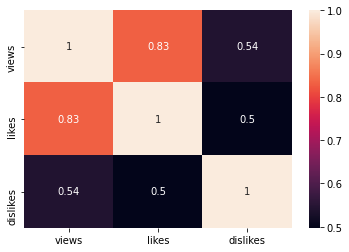

In [40]:
sns.heatmap(df.corr(),annot=True)

# Perform analysis on emojis used in comments:

In [41]:
comments['comment_text'].head()

0    It's more accurate to call it the M+ (1000) be...
1                To be there with a samsung phone\n😂😂😂
2    Thank gosh, a place I can watch it without hav...
3    What happened to the home button on the iPhone...
4    Power is the disease.  Care is the cure.  Keep...
Name: comment_text, dtype: object

There is a UNICODE associated with each character-

In [42]:
print('\U0001F600')

😀


In [43]:
# pip install emoji   Note: Latest version of emoji won't work, use pip install emoji==0.6.0

In [44]:
import emoji

In [45]:
str = ""
for i in comments['comment_text']:
    for j in i:
        if j in emoji.UNICODE_EMOJI:
            str = str+j
            

In [46]:
len(str)              # There are total 341868 emojis in comment_text column 

341868

In [47]:
# Dispaying only the first 200 characters of str-
str[:200]              # Printing all the emojis

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏🇪🇸😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿'

Keeping count of each unique emoji-

In [48]:
dict = {}
for i in set(str):
    dict[i] = str.count(i)

In [54]:
##displaying only the first 100 entries of dict-
dict_item = dict.items()
print(list(dict_item)[:100])

[('🇫', 81), ('🛑', 6), ('😨', 390), ('✖', 64), ('📒', 19), ('🐃', 16), ('🍴', 14), ('🖱', 11), ('🥊', 8), ('🛬', 4), ('🕊', 35), ('🛋', 5), ('⌛', 12), ('👾', 29), ('🛤', 5), ('👤', 28), ('☢', 20), ('🗽', 23), ('🏘', 8), ('🤨', 3), ('👢', 53), ('🍪', 75), ('🗝', 9), ('😏', 636), ('⚽', 223), ('☃', 12), ('🗒', 5), ('🇲', 270), ('🌸', 324), ('💇', 26), ('🏄', 15), ('🌀', 16), ('😦', 109), ('🔝', 178), ('🧞', 6), ('➕', 78), ('🏃', 47), ('🍋', 53), ('⤵', 6), ('👪', 13), ('🎻', 30), ('🚲', 14), ('👖', 29), ('👒', 17), ('🔋', 22), ('💑', 132), ('🤙', 171), ('😥', 860), ('🚣', 7), ('🍾', 143), ('😚', 583), ('🚵', 12), ('⚜', 27), ('🔅', 39), ('🆓', 8), ('🤹', 1), ('📕', 10), ('🍅', 30), ('㊗', 6), ('♨', 23), ('📐', 25), ('📑', 8), ('🍽', 8), ('🎂', 124), ('👡', 44), ('🐠', 45), ('🖊', 5), ('🚯', 6), ('➰', 7), ('🚐', 6), ('⏪', 14), ('🧤', 1), ('✝', 64), ('🐻', 59), ('💅', 166), ('🏣', 8), ('🎁', 106), ('💯', 1796), ('🔦', 16), ('🏥', 7), ('💽', 19), ('🦓', 1), ('🤸', 79), ('🎹', 112), ('🕕', 8), ('🕡', 7), ('🎫', 14), ('📋', 9), ('🍎', 52), ('↩', 5), ('🕒', 7), ('🏇', 12),

Sorting dict on the basis of Values-

In [55]:
final = {}
for (key,value) in sorted(dict.items(), key= lambda item:item[1]) :
    final[key] = value


In [56]:
# Displaying only the first 100 entries of final-
final_dict = final.items()
print(list(final_dict)[:100])

[('🤹', 1), ('🧤', 1), ('🦓', 1), ('🦏', 1), ('🧠', 1), ('🥌', 1), ('🥜', 1), ('🤟', 1), ('🥨', 1), ('🤾', 1), ('🧣', 1), ('🛷', 1), ('🤺', 1), ('🥟', 1), ('🥚', 1), ('🤽', 1), ('🛒', 1), ('🥡', 1), ('🧢', 2), ('🦖', 2), ('🥅', 2), ('🎌', 2), ('🦔', 2), ('🤱', 2), ('🧝', 2), ('🧒', 2), ('🧛', 2), ('🧘', 2), ('🧡', 2), ('🦕', 2), ('🤨', 3), ('🤫', 3), ('🤯', 3), ('🥖', 3), ('🥄', 3), ('🧐', 3), ('🛬', 4), ('☦', 4), ('🤬', 4), ('⚗', 4), ('🦐', 4), ('⏸', 4), ('💹', 4), ('⏯', 4), ('🤵', 4), ('🦍', 4), ('♾', 4), ('🗓', 4), ('⏹', 4), ('🛣', 4), ('🗄', 4), ('⏲', 4), ('🥞', 4), ('⏏', 4), ('🖇', 4), ('🧟', 4), ('🖍', 4), ('🗂', 4), ('🥈', 4), ('🦆', 4), ('☸', 4), ('🥝', 4), ('🏌', 4), ('🛢', 4), ('⚙', 4), ('♟', 4), ('🏷', 4), ('🛋', 5), ('🛤', 5), ('🗒', 5), ('🖊', 5), ('↩', 5), ('🚟', 5), ('🖲', 5), ('☂', 5), ('🎐', 5), ('🖨', 5), ('🔂', 5), ('🗞', 5), ('✡', 5), ('🚎', 5), ('🔼', 5), ('❎', 5), ('⚒', 5), ('↪', 5), ('🚠', 5), ('🕎', 5), ('🔖', 5), ('🗳', 5), ('➿', 5), ('↖', 5), ('♦', 5), ('🈁', 5), ('🖼', 5), ('⌨', 5), ('🧜', 5), ('🆖', 5), ('⏺', 5), ('↔', 5), ('🛂', 5)]

In [57]:
keys = [*final.keys()]
values = [*final.values()]

To get top 20 most used emojis in comments-

In [58]:
df = pd.DataFrame({'emojis':keys[-20:],'count':values[-20:]})

In [59]:
df

,emojis,count
0,🙌,2734
1,🏼,2961
2,💙,2968
3,💗,3071
4,👌,3534
5,💜,3616
6,🏻,4412
7,💖,4809
8,😊,4946
9,👏,5357


<AxesSubplot:xlabel='emojis', ylabel='count'>

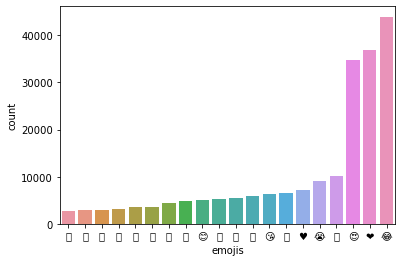

In [60]:
sns.barplot(df['emojis'],df['count'])